# #1 - The ”Sudo” Code Problem

### #1.1

In [58]:
j=0
k=0
for i in range(0,1001,2):
    if j==4:
        k+=1
        if k!=3:
            print i,"%",j,"=",i%j
        else:
            k=0
        j=0
    j+=1

8 % 4 = 0
16 % 4 = 0
32 % 4 = 0
40 % 4 = 0
56 % 4 = 0
64 % 4 = 0
80 % 4 = 0
88 % 4 = 0
104 % 4 = 0
112 % 4 = 0
128 % 4 = 0
136 % 4 = 0
152 % 4 = 0
160 % 4 = 0
176 % 4 = 0
184 % 4 = 0
200 % 4 = 0
208 % 4 = 0
224 % 4 = 0
232 % 4 = 0
248 % 4 = 0
256 % 4 = 0
272 % 4 = 0
280 % 4 = 0
296 % 4 = 0
304 % 4 = 0
320 % 4 = 0
328 % 4 = 0
344 % 4 = 0
352 % 4 = 0
368 % 4 = 0
376 % 4 = 0
392 % 4 = 0
400 % 4 = 0
416 % 4 = 0
424 % 4 = 0
440 % 4 = 0
448 % 4 = 0
464 % 4 = 0
472 % 4 = 0
488 % 4 = 0
496 % 4 = 0
512 % 4 = 0
520 % 4 = 0
536 % 4 = 0
544 % 4 = 0
560 % 4 = 0
568 % 4 = 0
584 % 4 = 0
592 % 4 = 0
608 % 4 = 0
616 % 4 = 0
632 % 4 = 0
640 % 4 = 0
656 % 4 = 0
664 % 4 = 0
680 % 4 = 0
688 % 4 = 0
704 % 4 = 0
712 % 4 = 0
728 % 4 = 0
736 % 4 = 0
752 % 4 = 0
760 % 4 = 0
776 % 4 = 0
784 % 4 = 0
800 % 4 = 0
808 % 4 = 0
824 % 4 = 0
832 % 4 = 0
848 % 4 = 0
856 % 4 = 0
872 % 4 = 0
880 % 4 = 0
896 % 4 = 0
904 % 4 = 0
920 % 4 = 0
928 % 4 = 0
944 % 4 = 0
952 % 4 = 0
968 % 4 = 0
976 % 4 = 0
992 % 4 = 0
1000 % 4 = 0


### #1.2

In [30]:
import numpy as np

In [29]:
# Assuming format is numpy array, and rows is in list form
# I made 3 seperate functions because of the way the question was asked
def sapient_matrix(matrix,rows):
    return matrix_sorter(column_30_values(matrix[rows]))

def columns_30_values(matrix):
    for i in range(len(matrix)):
        matrix[i][-1]=np.random.random()
    return matrix

def matrix_sorter(matrix):
    matrix.sort(key=lambda x:x[-1])
    return matrix



sapient_matrix(matrix,rows)




#--------------------------------
# You can do all of this in one function as such
def sapient_matrix(matrix,rows):
    new_matrix=matrix[rows]
    for i in range(len(new_matrix)):
        new_matrix[i][-1]=np.random.random()
    new_matrix.sort(key=lambda x:x[-1])
    return new_matrix

### #1.3

The code in section 1.1 has a time complexity of O(n). The list loops through only once. Of course, there are 2 counters (j and k) within the code, but this has minimal because k is nested in j.

The code in section 1.2, regardless of whether one uses 1 function or 3, has a time complexity of O(n+[rows]+[rows]\*log[rows]). Here, n refers to the 1000 initial rows of the matrix, and 'rows' refers to the indices found in part 1.1.. The first n comes from looping through each of the rows in the initial matrix to find only the ones we want to use. The [rows] comes from looping through all of the rows of the new matrix to change the last element. The rows*log[rows] comes from the time complexity of the sort function (which is something one can Google to check.)

# #2 - Quadtrees

In [473]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def make_points(number_of_points=50):
    x_points=[np.random.normal() for i in range(number_of_points)]
    x_points=[-3 if point<-3 else 3 if point>3 else point for point in x_points]
    y_points=[np.random.normal() for i in range(number_of_points)]
    y_points=[-3 if point<-3 else 3 if point>3 else point for point in y_points]
    return x_points,y_points

def quadtrees(n,k):
    number_of_points=n
    maximum_points=k
    x_points,y_points=make_points(number_of_points)
        
    # point_zone_dictionary assigns each point to the initial zone, zone 0
    point_zone_dictionary={i:0 for i in range(number_of_points)}

    # Creating list of zones; Format is [number_of_points,x_start,x_end,y_start,y_end,avg_x,avg_y]
    zones_list=[[number_of_points,min(x_points),max(x_points),min(y_points),max(y_points),\
                            np.mean(x_points),np.mean(y_points)]]

    # We don't need to pass anything back because we are altering the global variable within the function
    zone_splitter(point_zone_dictionary,zones_list,maximum_points,number_of_points,x_points,y_points)
    
    # final_zones_dict states the zone_number as key, and the zone_parameters as value
    # zone_parameters are [number_of_points,x_start,x_end,y_start,y_end,avg_x,avg_y]
    quadtrees_plotter(zones_list,point_zone_dictionary,x_points,y_points)


def quadtrees_plotter(zones_list,point_zone_dictionary,x_points,y_points):
    plt.subplots(figsize=(10,7))
    plt.scatter(x_points,y_points,cmap='hot',c=[point_zone_dictionary[i] for i in range(len(x_points))],s=35)
    densities=[]
    for zone in range(len(zones_list)):
        x1,x2=zones_list[zone][1],zones_list[zone][2]
        y1,y2=zones_list[zone][3],zones_list[zone][4]
        densities.append([zones_list[zone][0]/float(((x2-x1)*(y2-y1))),float(((x2-x1)*(y2-y1))),\
                              zones_list[zone][0]])
        plt.hlines([y1,y2],x1,x2)
        plt.vlines([x1,x2],y1,y2)
    plt.title("Quadtrees",size=25)
    plt.show()
    print "There are %s zones" %(len(zones_list))
    print "The most dense region has %s points and an area of %s units**2" \
                %(max(densities,key=lambda x: x[0])[2],max(densities,key=lambda x: x[0])[1])
    
    
    """point_zone_dictionary assigns each point to a zone"""
    """zones_list is the list of currently existing zones"""
    # zone_parameters are [number_of_points,x_start,x_end,y_start,y_end,avg_x,avg_y]
def zone_splitter(point_zone_dictionary,zones_list,maximum_points,number_of_points,x_points,y_points):
    zone_element=0
    boolean_value=True
    while boolean_value:
        if zone_element<len(zones_list):
            if zones_list[zone_element][0]>maximum_points:
                    # Will use these to keep track of which points go to what zone
                pcount_quad1,pcount_quad2,pcount_quad3,pcount_quad4=0,0,0,0
                xpos_quad1,xpos_quad2,xpos_quad3,xpos_quad4=[],[],[],[]
                ypos_quad1,ypos_quad2,ypos_quad3,ypos_quad4=[],[],[],[]
                    # [min,max,avg]
                split_x=[zones_list[zone_element][1],zones_list[zone_element][2],zones_list[zone_element][5]] 
                split_y=[zones_list[zone_element][3],zones_list[zone_element][4],zones_list[zone_element][6]]
                for point in point_zone_dictionary.keys():
                    if (x_points[point]>=split_x[0]) & (x_points[point]<=split_x[1]):
                        if (y_points[point]>=split_y[0]) & (y_points[point]<=split_y[1]):
                            x_quad=x_points[point]-split_x[2]
                            y_quad=y_points[point]-split_y[2]
                            if y_quad>=0:
                                if x_quad>=0:
                                    # We won't change the grouping here; we will overwrite the previous group
                                    pcount_quad1+=1
                                    xpos_quad1.append(x_points[point])
                                    ypos_quad1.append(y_points[point])
                                else:
                                    point_zone_dictionary[point]=len(zones_list)
                                    pcount_quad2+=1
                                    xpos_quad2.append(x_points[point])
                                    ypos_quad2.append(y_points[point])
                            else:
                                if x_quad>=0:
                                    point_zone_dictionary[point]=len(zones_list)+1
                                    pcount_quad3+=1
                                    xpos_quad3.append(x_points[point])
                                    ypos_quad3.append(y_points[point])
                                else:
                                    point_zone_dictionary[point]=len(zones_list)+2
                                    pcount_quad4+=1
                                    xpos_quad4.append(x_points[point])
                                    ypos_quad4.append(y_points[point])
                    ## Upper right,upper left,lower right,lower left
                zones_list[zone_element]=[pcount_quad1,split_x[2],split_x[1],split_y[2],split_y[1],\
                                  np.mean(xpos_quad1),np.mean(ypos_quad1)]
                zones_list.append([pcount_quad2,split_x[0],split_x[2],split_y[2],split_y[1],\
                                  np.mean(xpos_quad2),np.mean(ypos_quad2)])
                zones_list.append([pcount_quad3,split_x[2],split_x[1],split_y[0],split_y[2],\
                                  np.mean(xpos_quad3),np.mean(ypos_quad3)])
                zones_list.append([pcount_quad4,split_x[0],split_x[2],split_y[0],split_y[2],\
                                  np.mean(xpos_quad4),np.mean(ypos_quad4)])
            zone_element+=1
        else:
            boolean_value=False
    
    # Recursive Portion
    if max(zones_list,key=lambda x:x[0])[0]>maximum_points:
        zone_splitter(point_zone_dictionary,zones_list,maximum_points,\
                                                    number_of_points,x_points,y_points)
    return

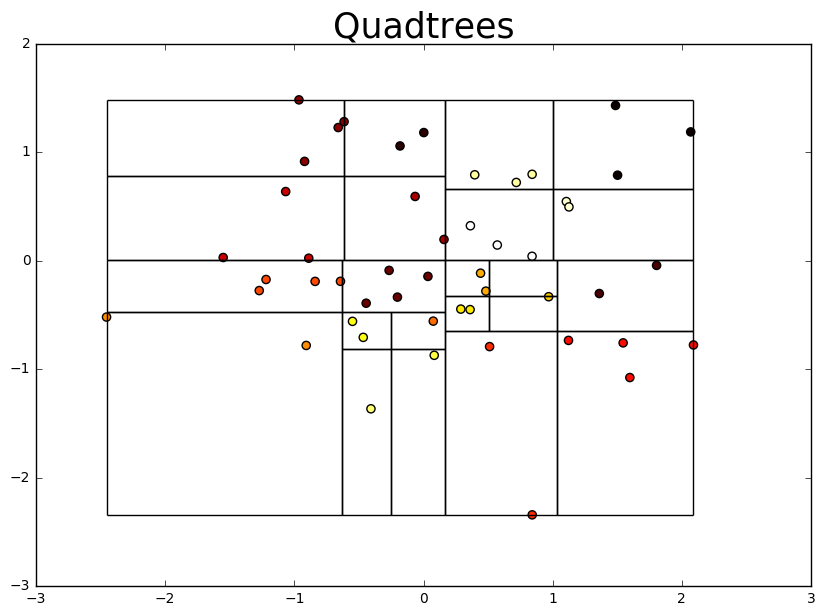

There are 22 zones
The most dense region has 2 points and an area of 0.111996501535 units**2


In [490]:
quadtrees(50,4)

NOTE: To make quadtrees more efficient, one could iterate through the points within a zone to find the splitting location that minimizes subsequent splits. For instance, if we split one zone with 20 points, we would want four zones with 5 points in each, not 3 zones with 6 points each and one zone with 2 points. Using this idea, we can reduce the number of zones from 13 to 4 in the example just mentioned. 

The time complexity of quadtrees is O($\dfrac{n}{k}*\dfrac{n}{0.666} + 9n + C*z $) $\sim$ O($\dfrac{3n^{2}}{2k} + 9n $).

The computationally expensive portion of the quadtrees algorithm is the splitting portion, which is the first set of terms in the O(...). The n/k is representative of the number of expected zones. We can expect in the perfect scenario for their to be $\dfrac{n}{k}$ completely filled zones. We get this number because it is the minimum possible number of zones. We also have a multiplicative factor of $\dfrac{n}{0.666}$. The n comes from having to iterate through all possible points in order to find those points that are within a particular zone. We can make this more efficient by saving the points within a particular zone. Additionally, we assume that the code is inefficient and state that on average each zone will be 2/3 full. Thus, we have a multiplicative factor of $\dfrac{3}{2}$.

The 9n comes from creating the various points and dictionaries to be used within the splitting portion. 

The $C*z$ comes from having to iterate through the 'z' zones up to 'C' times. The number of zones can be potentially small compared to n, so we can drop this term.

# #3 - Hyperspace 

### #3.1.0

If we have a M x M x 3 matrix and want to reduce it to an M x M x 1 matrix, there are a variety of possible ways to accomplish this (Some strategies call for min, max, mean, median, or mode). However, not all of these ways are valid for every situation. For instance, in the real world we use certain redundencies in communication to account for error within our electrical signal. In the case of file transfers, we might use a majority encoder to add redundancy in order to account for flipped bits. In this case of binary variables, we would not want the mean value (which is certainly a valid way to combine variables in other situations), we would want the median or mode. In another real world situation, such as finding the rainfall across a county, we would not want to find the mode, but rather the mean. 

So, we've established that reducing a matrix from being 3-D to 2-D requires an understanding of what the data is. In the case of this unknown data, it is impossible to state that any strategy is better than the average. The reason for this is that there are many more situations where the average is the most acceptable choice, versus using the mode, max, min, or something else. However, there are two mainstream 'averages' that people use: the mean and the median. The mean is simply all of the numbers added together and then divided by the count. The median is the most middle element of a sorted list of our numbers; in the case of an even length list, we take the mean of the most middle two numbers.

Two pros of the mean are 1) that it works well for a number coming from a continuous distribution, and 2) that it incorporates outliers. The cons of the mean are that it does not work well with categorical data, and that it can be highly biased if the numbers have a high variance relative to their count.

Two pros of the median are 1) it works extremely well for categorical data (as seen in the aforementioned communication problem), and 2) it tends to ignore any outliers. The cons of the median are that 1) the number can be biased more so then the mean, and that 2) it can ignore crucial events, such as in the rainfall scenario. 

NOTE: We could use a PCA dimensionality reduction here instead of mean (and it would be best to), but I don't believe that was the purpose of the question. (We would implement PCA by assuming M\*\*2 points in 3-D space, and using the PCA library's dimensionality reduction feature). The pro of this method is that we are finding the relationship of all of the axes, and are generating a weighted mean. The con of this strategy is that for high variance data, we will be removing important information. On a sub-note, we would be removing information from the mean and median as well in this case. We would not use PCA as a replacement for mode or median, such as in the file transfter scenario. On another sub-note, we make the assumption that all features are the same and vectors are of the same variable. If features are different across the vectors, then we would be comparing dissimilar points, and our PCA would return a meaningless result.

In [487]:
# Note, I have assumed the entire input matrix has been loaded into Python
def matrix_layer_reduction(input_matrix):
    M=len(input_matrix)
    return np.array([[np.mean(input_matrix[j][i][:]) for i in range(M)] for j in range(M)])

### #3.1.1

The computational constraints of our strategies are definitely memory and time based.

For time, the complexity of the mean are less than the median, but both require iterating through every element of every matrix. The mean just adds the three elements {i,j,1},{i,j,2},{i,j,3} together and divides by three. This mean then gets put into a new M x M x 1 matrix at position {i,j,1}. The median however, requires that we find the max of the list of our three elements and remove it, and then find the min of our list of three elements and remove it. Then, we have our median which we likewise put into our M x M x 1 matrix. In the case of extremely complex numbers, the mean's complexity certainly increases relative to the median's complexity. In the case of just iterating through the elements, using the median we must iterate through two additional elements relative to the mean's three elements. In the case of PCA, it is extremely time intensive, as we must look at the variance of each axis.

For memory, both mean and median use about the same amount of memory, where nearly all of the memory is dedicated to storing the matrices. PCA, however, would be very expensive on a memory basis, which is one reason why someone might not use it over our mean strategy.

If we were to implement the transformation using either the mean or median, it would be most effective to read in one 'element' at a time, s.t. {i,j,:}, and compute the new matrix element by element. Using this methodology, we would not need to worry about storing the original matrix in memory, which would increase the stored memory amount by an additional 300%. Again, with PCA, we would need all of our data read in, so we cannot get around this 'memory hump'.

### #3.2.0

For clarification, I am understanding this problem to state that within a M x M x 3 input matrix, there is low variation of values across the {i,j,:} points, meaning there is a very narrow, or dirac-like distribution for any set of elements of the format {i,j,:}. Furthermore, I understand this problem to be stated as meaning that after transforming our data to an M x M x 1 martix, there is a gradual but near insignificant change from point {i,j,1} to point {i+1,j,1} or {i,j+1,1}. As such, we may compress the matrix, so to speak, to a P x P x 1 size, as we are not losing much information.

Since the data has been assumed to have insignificant difference between the {i,j,:} points, it would be fair to use the predefined mean as our initial transformation strategy ( M x M x 3 --> M x M x 1 ). For one, we lose an insignificant amount of information, and two, it is quickest. 

As for the transformation from ( M x M x 1 --> P x P x 1 ), we would effectively take the mean of the windowns of the size M/P X M/P. This is similar to the scrolling window strategy of the convolutional layer of a convolutional neural network.

In [486]:
# While this strategy will certainly work, there are better ways to compress a matrix. The improved strategy I have
# in mind is to include those fractions of elements that are not included within our scrolling window. In english,
# our window spans from (0,0) to (2.3, 2.3). In my code, I adjust the window to be (0,0) to (2,2), thus leaving the
# next element to be picked up by the next window. We can improve the code by weighting those 'next elements' to be
# only 0.3 instead of 1.0 in the summed count.
def matrix_compression(reduced_matrix,P):
    M=len(reduced_matrix)
    a=float(M)/P
    curr_row=0.
    compressed_matrix=[]
    for iteration_1 in range(P):
        curr_col=0.
        compressed_row=[]
        for iteration_2 in range(P):
            flat_grid=[]
            # We add the elements in our subregion to a list
            for i in range(curr_row,int(curr_row+a)):
                for j in range(curr_col,int(curr_col+a)):
                    flat_grid.append(reduced_matrix[i][j])
            # We add the mean of the subregion to a compressed row
            compressed_row.append(np.mean(flat_grid))
            curr_col+=a
        # We add our compressed row to the compressed matrix
        compressed_matrix.append(flat_row)
        curr_row+=a
    return compressed_matrix

### #3.2.1

The constraints of the above code are time and memory. 

For time, the complexity is O($M^2$). In order to compress them M x M matrix, we have to go through every element with my code above. 

For memory, the reduced_matrix could be potentially large. If it is too large to fit into memory at once, we can use a similar strategy to 3.1.1 which was to load in a certain number of rows at any given time.

Since the code has already been written, we can definitely implement it if we choose to. Again, depending upon input_matrix size, we may have to adjust my code.

### #3.3

When it comes time to determine whether some event occurs, e ∈ {1, 2, 3}, we must adjust the transformations to be a classification problem. By transforming the data, we can be selective and choose only the information that is relevant. For example, let e=1 be completely normal, e=2 be worrisome, and e=3 be extremely worrisome. In this case, we don't care to find out a mean or median; we want to know whether e=3 at all. For this reason, we would use the max({i,j,:}) transformation. Furthermore, when we compress our matrix, we would take the max value of our scrolling window. Now we have increased our chances of finding whether e=3. If e=3 in 1 of every 1000 input matrices, we have transformed our probabilty of finding this event from $\frac{1}{1000*3M^2}$ to $\frac{1}{1000*P^2}$ (note we only get one observation, and I have assumed that each data point is an observation).

However, in the case of determining the probability of whether some event occurs or not, we must can assume a binomial distribution. Let's say we want to know the probability of whether e=1 occurs. We would make our initial layer reduction transformation (where we reduce the M x M x 3 matrix to a M x M x 1 matrix) be of {i,j,:}.count(1)/3.. From this, we have found the number of occurrence of e=1 and have divided by the total number of occurrences. From this, we can compress our matrix to a P x P x 1 shape by taking the mean of the A x A windows. Now we have the probability of an event occurring within each one of those windows. Furthermore, if we make A=3, we find that our window has 9 samples, where each sample is derived from 3 samples; thus, we have a total of 27 samples per window. Many statisticians use a 30 sample minimum to derive an assumed distribution. Since 27 is so close to 30 (30 is not a definite number of samples) we may state that our sample size is reasonable. If our data is truly random, we may further state that our probability has an error of $\sqrt{pq}$. This error is standard for a binomial distribution, we would use a different error term for different distributions. If we wanted to find out how many times an event occurs in 30 trials, we would use $n * p ± \sqrt{npq}$. If $p=0.3$, we would expect $e=30*0.3±\sqrt{30*0.3*0.7}=9±6.3$

If our data is organized, we cannot use the current compression or layer-reduction techniques. Instead, we can simply take n=30 random samples, and then find the probability of whether event e does or does not occur.

In the case of determining the probabilities of e=1, e=2, and e=3, we can use the same techniques as above for each of the events, and state a probability (with ± error term) for each of these events occurring.

# #4 - 

# #5 - Predicting Flight Delays

Assumptions:
* All flights are departures from Airport X
* Airport X does not favor one airline over another (i.e. it is not a hub of UA, DL, or AA)
* Cancellations are due to issues at Airport X, and not due to issues at the airport being flown to

In [774]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline

In [775]:
df=pd.read_csv('/Users/thomas/Downloads/CancelledFlights.csv',names=['Cancelled','Month','Departure_Time','Airline',\
                                                                'SchedElapsedTime','ArrDelay','DepDelay','Distance'])

In [776]:
def distance_bin(distance):
    if distance<500:
        return "Short"
    elif distance<1500:
        return "Medium"
    return "Long"
def depart_time_bin(time):
    if len(str(time))==2:
        return 0
    if len(str(time))==3:
        return int(str(time)[0])
    return int(str(time)[:2])

In [777]:
df['Distance']=df['Distance'].apply(lambda x: distance_bin(x))
df["Departure_Time"]=df["Departure_Time"].apply(lambda x: depart_time_bin(x))

In [569]:
pd.concat([df.head(5),df.tail(5)])

,Cancelled,Month,Departure_Time,Airline,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,8,UA,134,0,0,Medium
1,1,12,8,DL,90,0,0,Short
2,1,1,18,UA,213,0,0,Long
3,1,4,17,AA,80,0,0,Short
4,1,7,14,UA,103,0,0,Short
5995,0,6,17,AA,115,17,30,Medium
5996,0,9,19,DL,127,-19,-9,Medium
5997,0,8,18,DL,101,6,-4,Short
5998,0,7,17,AA,210,178,42,Medium
5999,0,9,19,AA,265,4,3,Long


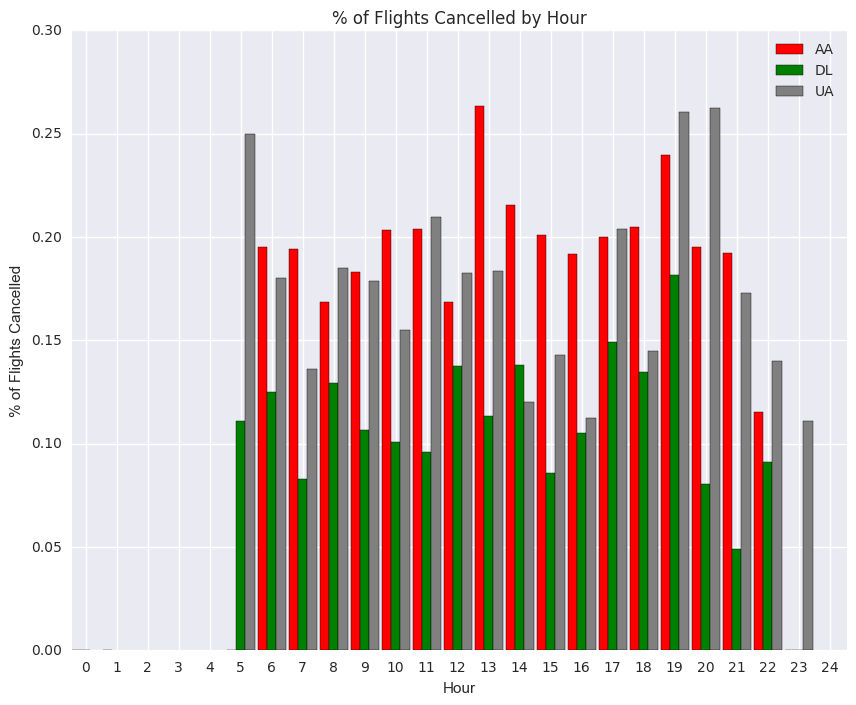

In [598]:
temp=df.groupby(['Airline','Departure_Time'])['Cancelled'].sum().to_frame()
temp=temp.merge(df.groupby(['Airline','Departure_Time'])['Cancelled'].count().to_frame(),left_index=True,\
                                right_index=True)
temp.columns=['Cancelled','Total']
temp['Percentage_Cancelled']=temp['Cancelled']/temp['Total']
temp=temp.reset_index()
i=0
color=['red','green','gray']
location=[0,.3,0.6]
plt.subplots(figsize=(10,8))
for airline in temp['Airline'].unique():
    plt.bar(temp[temp['Airline']==airline]['Departure_Time']+location[i],\
            temp[temp['Airline']==airline]['Percentage_Cancelled'],width=0.3,color=color[i],label=airline)
    i+=1
plt.legend()
plt.title('% of Flights Cancelled by Hour')
plt.ylabel('% of Flights Cancelled')
plt.xlabel('Hour')
plt.xticks(np.linspace(.45,24.45,25),range(25))
plt.show()

AA seems to cancel flights much more often at lunch time. UA seems to cancel flights more often than others when it is early in the morning or late at night. DL seems to be pretty consistent. There are too many hours to incorporate into our model along with month. It would be easier to just allow the mean value to be used, there isn't that much fluctuation.

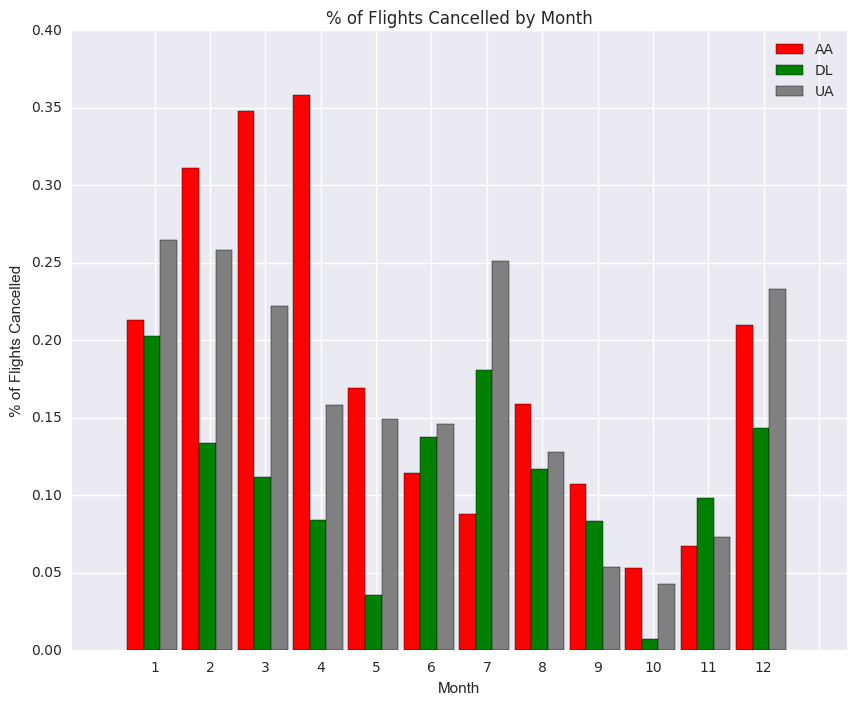

In [609]:
temp=df.groupby(['Airline','Month'])['Cancelled'].sum().to_frame()
temp=temp.merge(df.groupby(['Airline','Month'])['Cancelled'].count().to_frame(),left_index=True,\
                                right_index=True)
temp.columns=['Cancelled','Total']
temp['Percentage_Cancelled']=temp['Cancelled']/temp['Total']
temp=temp.reset_index()
i=0
color=['red','green','gray']
location=[0,.3,0.6]
plt.subplots(figsize=(10,8))
for airline in temp['Airline'].unique():
    plt.bar(temp[temp['Airline']==airline]['Month']+location[i],\
            temp[temp['Airline']==airline]['Percentage_Cancelled'],width=0.3,color=color[i],label=airline)
    i+=1
plt.legend()
plt.title('% of Flights Cancelled by Month')
plt.ylabel('% of Flights Cancelled')
plt.xlabel('Month')
plt.xticks(np.linspace(1.5,13.5,13),range(1,13))
plt.show()

There are definite seasonal trends in our data, most likely due to weather. Without having additional information, I will assume that weather plays a role in flight cancellations (out of experience). 

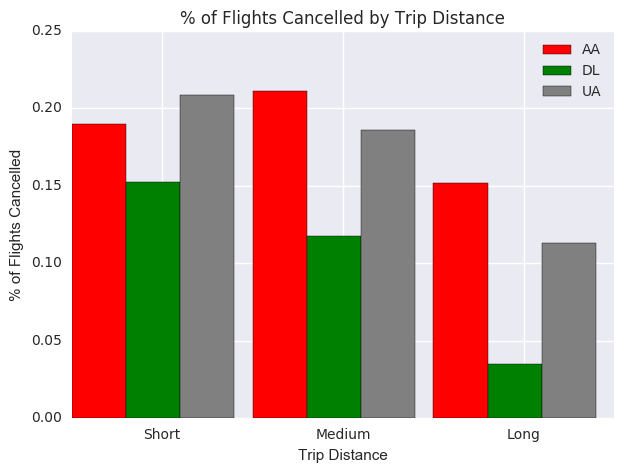

In [660]:
temp=df.groupby(['Airline','Distance'])['Cancelled'].sum().to_frame()
temp=temp.merge(df.groupby(['Airline','Distance'])['Cancelled'].count().to_frame(),left_index=True,\
                                right_index=True)
temp.columns=['Cancelled','Total']
temp['Percentage_Cancelled']=temp['Cancelled']/temp['Total']
temp=temp.reset_index()
i=0
color=['red','green','gray']
location=[0,.3,0.6]
plt.subplots(figsize=(7,5))
for airline in temp['Airline'].unique():
    plt.bar(temp[temp['Airline']==airline]['Distance'].apply(lambda x: 0 if x=='Short' else 1 if x=='Medium' else 2)+location[i],\
            temp[temp['Airline']==airline]['Percentage_Cancelled'],width=0.3,color=color[i],label=airline)
    i+=1
plt.legend()
plt.title('% of Flights Cancelled by Trip Distance')
plt.ylabel('% of Flights Cancelled')
plt.xlabel('Trip Distance')
plt.xticks(np.linspace(.5,2.5,3),['Short','Medium','Long'])
plt.show()

There is a clear drop in % cancellation for DL and UA as the flights travel a further distance. AA is a little strange in this regard.

In [611]:
df.head()

,Cancelled,Month,Departure_Time,Airline,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,8,UA,134,0,0,Medium
1,1,12,8,DL,90,0,0,Short
2,1,1,18,UA,213,0,0,Long
3,1,4,17,AA,80,0,0,Short
4,1,7,14,UA,103,0,0,Short


#### The Model

To keep the model simple, I will not use hourly data. Furthermore, I have binned Distance because I do not want to over-complicate my model. The provided delay information is not important, as tardiness is reflective of an airline's punctuality/preparedness, and days where all flights are delayed does not need to be accounted for, especially if we assume that all airlines act the same under certain weather conditions. Because we do not have weather data, we can not test this assumption. However, if we regard winter months versus summer months, we find that AA tends to cancel flights more often in winter conditions (ice and snow presumably). Thus, using months will incorporate an airline's cancellation rate relative to a weather condition.

In [806]:
Y=df['Cancelled']
X=df[['Month','Airline','Distance']].copy()
X['Month']=X['Month'].astype(str)
X=pd.get_dummies(X)
for col in['Month_6','Distance_Long','Airline_AA']:
    del X[col]
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [807]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.83666666666666667

In [808]:
def convert_info(month,airline,distance):
    month='Month_'+str(month)
    airline='Airline_'+str(airline)
    distance='Distance_'+str(distance)
    cols=x_train.columns
    col_dict={cols[i]:i for i in range(len(x_train.columns))}
    input_info=[0]*15
    for info in [month,airline,distance]:
        if info in col_dict.keys():
            input_info[col_dict[info]]=1
    input_info=np.reshape(input_info,(1,-1))
    return input_info

#### Probability of Cancellation

In [841]:
airlines_probs=[]
for airline in ['AA','DL','UA']:
    prob_list=[]
    for month in range(1,13):
        for distance in ['Short','Medium','Long']:
            pred=model.predict(convert_info(month,airline,distance))
            prob=model.predict_proba(convert_info(month,airline,distance))
            prob_list.append(prob[0][1])
            if pred[0]==1:
                print pred
    airlines_probs.append(np.mean(prob_list))
print zip(['AA','DL','UA'],airlines_probs)

[('AA', 0.1629902746498571), ('DL', 0.099372094534810787), ('UA', 0.15991735937070745)]


Although our model only outputs a zero for cancellation prediction (because in no available scenario is there a 50% chance of cancellation), we can choose a certain scenario to test for probability of cancellation. In testing all scenarios, we find the overall lowest cancellation probability to be Delta's. This could change according to certain parameters, but I will leave that to the agent. This model is in essence a pd.groupby()

In [851]:
## Feel free to play with finding probabilities by using the uncommented code below
month=12        # 1-12
airline="DL"       # 'AA, DL, UA
distance='Medium'  # Short,Medium,Long
print "%s%% chance of cancellation" %(np.round(model.predict_proba(convert_info(month,airline,distance)),3)[0][1]*100)

13.4% chance of cancellation


It would be better to have more data because this model is in essence a groupby of a single airport for a single year of cancellation information.

# #6

### Please find the presentation here: 
https://docs.google.com/presentation/d/13uoI2h8JtqTooTZiuVSudDhL7isNKxMs0eR2r7o0IN4/edit?usp=sharing

In [867]:
model_decile=pd.read_csv('/Users/thomas/Downloads/sapient_case_questioning.csv')
model_results=pd.read_csv('/Users/thomas/Downloads/sapient_regression_coef.csv')

In [868]:
for col in model_decile.columns[1:]:
    model_decile[col]=model_decile[col].apply(lambda x: float(str(x)[:-1]))

In [893]:
model_decile=pd.concat([pd.DataFrame([[0],[10.0],[0.],[0.],[0.],[0.]],index=model_decile.columns).T,model_decile])

In [994]:
model_decile=model_decile.reset_index()
del model_decile['index']

In [995]:
model_decile

,Decile,Random per Decile,Random Cumulative,Logistic Per Decile,Logistic Cumulative,Difference
0,0.0,10.0,0.0,0.0,0.0,0.0
1,1.0,10.0,10.0,37.3,37.3,27.3
2,2.0,10.0,20.0,19.1,56.4,36.4
3,3.0,10.0,30.0,12.2,68.6,38.6
4,4.0,10.0,40.0,9.0,77.6,37.6
5,5.0,10.0,50.0,7.3,84.9,34.9
6,6.0,10.0,60.0,5.2,90.1,30.1
7,7.0,10.0,70.0,3.7,93.8,23.8
8,8.0,10.0,80.0,3.1,96.9,16.9
9,9.0,10.0,90.0,2.2,99.1,9.1


In [1009]:
model_decile.iloc[1]['Logistic Per Decile']

37.299999999999997

In [1012]:
auc_calc=0.
for row in model_decile.index[:-1]:
    auc_calc+=model_decile.iloc[row]['Logistic Per Decile']*.01*.1*(9-row+.5)
print auc_calc

0.65515


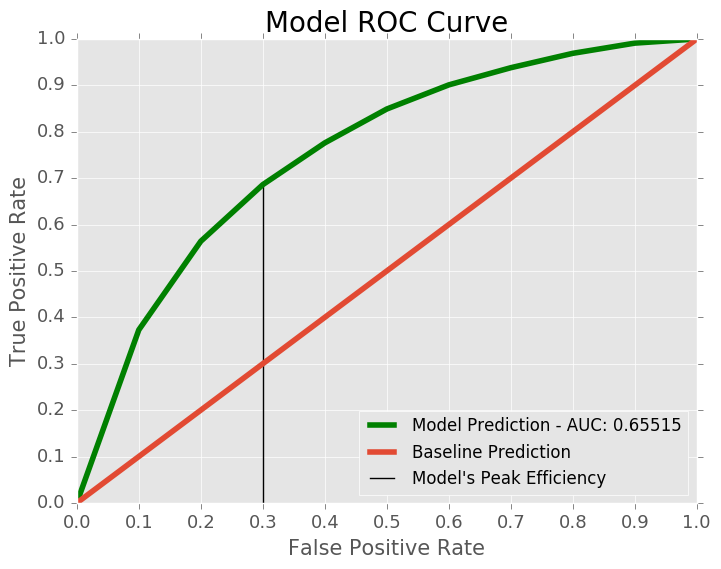

In [1054]:
plt.style.use('ggplot')
plt.subplots(figsize=(8,5.8))
plt.plot(model_decile['Random Cumulative'],model_decile['Logistic Cumulative'],\
         label='Model Prediction - AUC: %s' %(auc_calc),linewidth=4,color='green')
plt.plot(model_decile['Random Cumulative'],model_decile['Random Cumulative'],\
         label='Baseline Prediction',linewidth=4)
# plt.vlines(30,64,72,linewidth=6,label="Model's Peak Efficiency")
plt.title('Model ROC Curve',size=20)
plt.vlines(30,0,68.6,linewidth=1,label="Model's Peak Efficiency")
plt.xticks(range(0,101,10),np.linspace(0,1.0,11),size=13)
plt.xlabel('False Positive Rate',size=15)
plt.yticks(range(0,101,10),np.linspace(0,1.0,11),size=13)
plt.ylabel('True Positive Rate',size=15)
# plt.scatter(30,68.6,c='red',s=55,label='Model becomes less efficient')
plt.legend(loc='lower right')
plt.show()

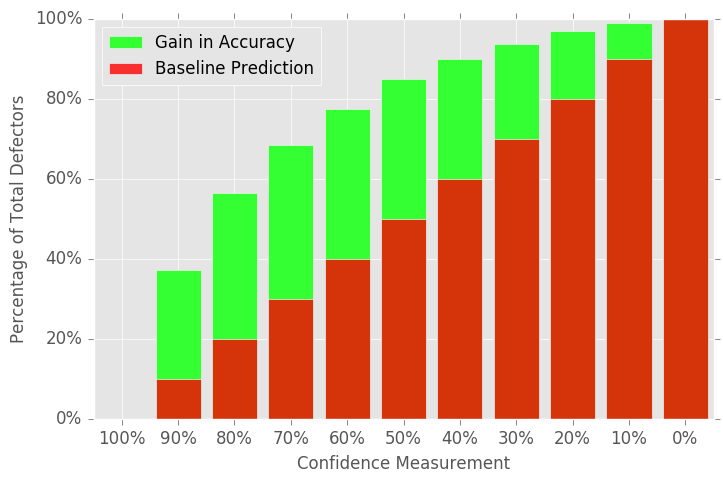

In [1025]:
plt.style.use('ggplot')
plt.subplots(figsize=(8,5))
plt.bar(model_decile['Random Cumulative']-4,model_decile['Logistic Cumulative'],label='Gain in Accuracy',\
        width=8,color=(.2,1,.2,1.))
plt.bar(model_decile['Random Cumulative']-4,model_decile['Random Cumulative'],label='Baseline Prediction',\
        width=8,color=(1.,0,0,.8))
plt.legend(loc='upper left')
plt.xticks(range(0,101,10),[str(x)+"%" for x in range(100,-1,-10)],size=12)
plt.xlim(-5,105)
plt.yticks(range(0,101,20),[str(x)+"%" for x in range(0,101,20)],size=12)
plt.xlabel('Confidence Measurement')
plt.ylabel('Percentage of Total Defectors')
plt.show()

In [1037]:
feature_array=zip(model_results['Parameter'].values,model_results['Estimate'].values)

In [1048]:
feature_array.sort(key=lambda x: np.abs(x[1]))
feature_array=feature_array[::-1]
pd.DataFrame(feature_array[:7],columns=['Parameters','Beta Coefficient'])

,Parameters,Beta Coefficient
0,Intercept,-6.4701
1,Average_transactions_per_month,1.0121
2,Logged_customer_tenure_(days),0.6629
3,Made_first_purchase_within_last_month_(binary),0.6250
4,Unsubscribed_from_email_notifications,-0.5641
5,No_purchase_up_to_360_days_prior_(binary),-0.3376
6,Logged_days_since_last_purchase,0.1028
